In [1]:
import pandas as pd
from geopy.distance import geodesic
import gmplot
import webbrowser
import numpy as np
import networkx as nx

In [3]:
#Read the csv file to get all the store locations
file = pd.read_csv("starbucks_2018_11_06.csv")

In [4]:
#Get the data from the file and transfer into dataframe named 'storesData'
countryList = ['KR', 'JP', 'CA', 'GB', 'CN']

tempStoresData = [[row['state'], row['latitude'], row['longitude'], row['name']] for index, row in file.iterrows() if row['state'] in countryList]
storesData = pd.DataFrame(tempStoresData)
storesData.columns = ['country', 'latitude', 'longitude', 'name']

In [5]:
#Search the distance between 2 stores for each store for each country
distanceList = list()

for country in countryList:
    latitude = [storesData['latitude'][x] for x in range(len(storesData)) if storesData['country'][x] == country]
    longitude = [storesData['longitude'][x] for x in range(len(storesData)) if storesData['country'][x] == country]
    numOfStores = len(latitude)
    tempDistance = [[0 for y in range(numOfStores)] for x in range(numOfStores)]
    
    #Distance between stores
    for i in range(numOfStores):
        for j in range(i+1, numOfStores):
            distance = geodesic((latitude[i], longitude[i]), (latitude[j], longitude[j])).km
            tempDistance[i][j] = distance
            #tempDistance[j][i] = tempDistance[i][j] because the distance from a to b is the same as from b to a
            tempDistance[j][i] = tempDistance[i][j]
    distanceList.append(tempDistance)
    print(country + ' ok')

#Distance matrix for each country
koreaDistanceList = pd.DataFrame(distanceList[0])
japanDistanceList = pd.DataFrame(distanceList[1])
canadaDistanceList = pd.DataFrame(distanceList[2])
gBritainDistanceList = pd.DataFrame(distanceList[3])
chinaDistanceList = pd.DataFrame(distanceList[4])

KR ok
JP ok
CA ok
GB ok
CN ok


In [6]:
#Calculate average distance between stores in each countries
koreaAveDistance = [sum(koreaDistanceList[i])/len(koreaDistanceList) for i in range(len(koreaDistanceList))]
japanAveDistance = [sum(japanDistanceList[i])/len(japanDistanceList) for i in range(len(japanDistanceList))]
canadaAveDistance = [sum(canadaDistanceList[i])/len(canadaDistanceList) for i in range(len(canadaDistanceList))]
gBritainAveDistance = [sum(gBritainDistanceList[i])/len(gBritainDistanceList) for i in range(len(gBritainDistanceList))]
chinaAveDistance = [sum(chinaDistanceList[i])/len(chinaDistanceList) for i in range(len(chinaDistanceList))]

averageDistance = [koreaAveDistance, japanAveDistance, canadaAveDistance, gBritainAveDistance, chinaAveDistance]

In [7]:
#Get store with shortest average distance to be the distribution center
koreaShortest = min(koreaAveDistance)
japanShortest = min(japanAveDistance)
canadaShortest = min(canadaAveDistance)
gBritainShortest = min(gBritainAveDistance)
chinaShortest = min(chinaAveDistance)
shortestList = [koreaShortest, japanShortest, canadaShortest, gBritainShortest, chinaShortest]

storeIndex = [0 for i in range(len(countryList))]
for i in range(len(storeIndex)):
    for j in range(len(averageDistance[i])):
        if averageDistance[i][j] == shortestList[i]:
            storeIndex[i] = j
            break

In [8]:
#Create a list of distribution centers 
distributionCenterLoc = list()

i = 0
for country in countryList:
    latitude = [storesData['latitude'][i] for i in range(len(storesData)) if storesData['country'][i] == country]
    longitude = [storesData['longitude'][i] for i in range(len(storesData)) if storesData['country'][i] == country]
    name = [storesData['name'][i] for i in range(len(storesData)) if storesData['country'][i] == country]
    distributionCenterLoc.append([storeIndex[i], latitude[storeIndex[i]], longitude[storeIndex[i]], name[storeIndex[i]]])
    i += 1
print(distributionCenterLoc)

[[157, 37.49236, 127.01422, '교대점'], [340, 35.657433, 139.338649, 'Hachioji Tokyu Square'], [611, 51.054574, -113.981984, 'Safeway #8803 Northgate, Calgary'], [200, 51.639082, -0.309162, 'Elstree - Village Hotel'], [333, 30.274128, 120.13665, '杭州EAC店']]


In [9]:
#Export the list to csv file
i = 0
for country in countryList:
    tempD = pd.DataFrame(distanceList[i])
    fileSave = country + '.csv'
    tempD.to_csv(fileSave, index=False)
    i += 1

pd.DataFrame(distributionCenterLoc).to_csv('Distribution Center.csv', index=False)


In [16]:
#Korea Map
koreaStoreLocation = [(storesData['latitude'][i], storesData['longitude'][i]) for i in range(len(storesData)) if storesData['country'][i] == 'KR']
koreaStore = zip(*koreaStoreLocation)
koreaDistibutionCenter = zip(*[(distributionCenterLoc[0][1],distributionCenterLoc[0][2])])
gmap = gmplot.GoogleMapPlotter(distributionCenterLoc[0][1],
                                distributionCenterLoc[0][2], 15 )
gmap.scatter(*koreaStore, color='blue', marker=True)
gmap.scatter(*koreaDistibutionCenter, color='black', size=10, marker=True)

gmap.draw('map\koreaMap.html')
webbrowser.open_new_tab("map\koreaMap.html")

#Japan Map
japanStoreLocation = [(storesData['latitude'][i], storesData['longitude'][i]) for i in range(len(storesData)) if storesData['country'][i] == 'JP']
japanStore = zip(*japanStoreLocation)
japanDistributionCenter = zip(*[(distributionCenterLoc[1][1], distributionCenterLoc[1][2])])
gmap = gmplot.GoogleMapPlotter(distributionCenterLoc[1][1], distributionCenterLoc[1][2], 15)
gmap.scatter(*japanStore, color='blue', marker=True)
gmap.scatter(*japanDistributionCenter, color='black', size=10, marker=True)

gmap.draw("map\japanMap.html")
webbrowser.open_new_tab("map\japanMap.html")

#Canada Map
canadaStoreLocation = [(storesData['latitude'][i], storesData['longitude'][i]) for i in range(len(storesData)) if storesData['country'][i] == 'CA']
canadaStore = zip(*canadaStoreLocation)
canadaDistributionCenter = zip(*[(distributionCenterLoc[2][1], distributionCenterLoc[2][2])])
gmap = gmplot.GoogleMapPlotter(distributionCenterLoc[2][1], distributionCenterLoc[2][2], 15)
gmap.scatter(*canadaStore, color='blue', marker=True)
gmap.scatter(*canadaDistributionCenter, color='black', size=10, marker=True)

gmap.draw("map\canadaMap.html")
webbrowser.open_new_tab("map\canadaMap.html")

#Great Britain Map
gBritainStoreLocation = [(storesData['latitude'][i], storesData['longitude'][i]) for i in range(len(storesData)) if storesData['country'][i] == 'GB']
gBritainStore = zip(*gBritainStoreLocation)
gBritainDistributionCenter = zip(*[(distributionCenterLoc[3][1], distributionCenterLoc[3][2])])
gmap = gmplot.GoogleMapPlotter(distributionCenterLoc[3][1], distributionCenterLoc[3][2], 15)
gmap.scatter(*gBritainStore, color='blue', marker=True)
gmap.scatter(*gBritainDistributionCenter, color='black', size=10, marker=True)

gmap.draw("map\gBritainMap.html")
webbrowser.open_new_tab("map\gBritainMap.html")

#China Map
chinaStoreLocation = [(storesData['latitude'][i], storesData['longitude'][i]) for i in range(len(storesData)) if storesData['country'][i] == 'CN']
chinaStore = zip(*chinaStoreLocation)
chinaDistributionCenter = zip(*[(distributionCenterLoc[4][1], distributionCenterLoc[4][2])])
gmap = gmplot.GoogleMapPlotter(distributionCenterLoc[4][1], distributionCenterLoc[4][2], 15)
gmap.scatter(*chinaStore, color='blue', marker=True)
gmap.scatter(*chinaDistributionCenter, color='black', size=10, marker=True)

gmap.draw("map\chinaMap.html")
webbrowser.open_new_tab("map\chinaMap.html")

True

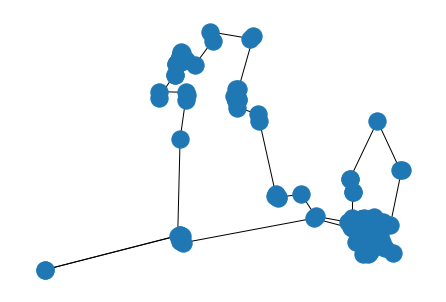

In [22]:
# Plot the graph
# Korea
tempNode = koreaStoreLocation
n = len(tempNode)
G = nx.complete_graph(n)

for i,j in G.edges:
    G.edges[i,j]['distance'] = koreaDistanceList[i][j]

T = nx.minimum_spanning_tree(G, weight='distance')
#nx.draw(T, pos=tempNode)

# identify the odd degree node
odd_degree_nodes = [i for i in T.nodes if T.degree(i) % 2]

# find a minimum-cost perfect matching over the odd-degree nodes
for i,j in G.edges:
    G.edges[i,j]['neg_length'] = - G.edges[i,j]['distance']
matching = nx.max_weight_matching(G.subgraph(odd_degree_nodes), maxcardinality=True, weight='neg_length')
#print(matching)

# create a multigraph with edge_set = (spanning tree edges) + (matching)
M = nx.MultiGraph()

M.add_nodes_from(range(n))

M.add_edges_from(T.edges())
M.add_edges_from(matching)

# find the Eulerian cycle of the multigraph
#nx.draw(M,pos=tempNode)

initial_tour = list(nx.eulerian_circuit(M, source=255))

# take shortcut (avoid repeated nodes)
tour = [ 255 ]
for i,j in initial_tour:
    if j not in tour:
        tour.append(j)

# draw the tour
tour_edges = [ (tour[i-1], tour[i]) for i in range(n)]
nx.draw(G.edge_subgraph(tour_edges), pos=tempNode)

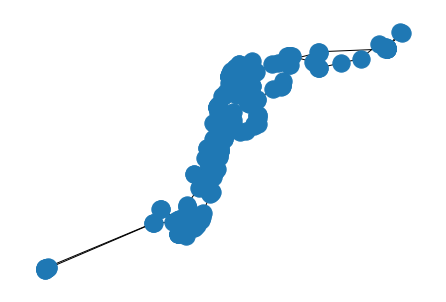

In [23]:
# Japan
tempNode = japanStoreLocation
n = len(tempNode)
G = nx.complete_graph(n)

for i,j in G.edges:
    G.edges[i,j]['distance'] = japanDistanceList[i][j]

T = nx.minimum_spanning_tree(G, weight='distance')
#nx.draw(T, pos=tempNode)

T = nx.minimum_spanning_tree(G, weight='distance')
#nx.draw(T, pos=tempNode)

# identify the odd degree node
odd_degree_nodes = [i for i in T.nodes if T.degree(i) % 2]

# find a minimum-cost perfect matching over the odd-degree nodes
for i,j in G.edges:
    G.edges[i,j]['neg_length'] = - G.edges[i,j]['distance']
matching = nx.max_weight_matching(G.subgraph(odd_degree_nodes), maxcardinality=True, weight='neg_length')
#print(matching)

# create a multigraph with edge_set = (spanning tree edges) + (matching)
M = nx.MultiGraph()

M.add_nodes_from(range(n))

M.add_edges_from(T.edges())
M.add_edges_from(matching)

# find the Eulerian cycle of the multigraph
#nx.draw(M,pos=tempNode)

initial_tour = list(nx.eulerian_circuit(M, source=255))

# take shortcut (avoid repeated nodes)
tour = [ 255 ]
for i,j in initial_tour:
    if j not in tour:
        tour.append(j)

# draw the tour
tour_edges = [ (tour[i-1], tour[i]) for i in range(n)]
nx.draw(G.edge_subgraph(tour_edges), pos=tempNode)

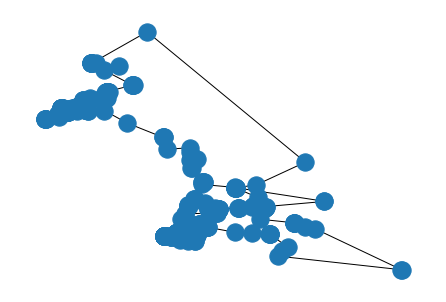

In [24]:
# Canada
tempNode = canadaStoreLocation
n = len(tempNode)
G = nx.complete_graph(n)

for i,j in G.edges:
    G.edges[i,j]['distance'] = canadaDistanceList[i][j]

T = nx.minimum_spanning_tree(G, weight='distance')
#nx.draw(T, pos=tempNode)

T = nx.minimum_spanning_tree(G, weight='distance')
#nx.draw(T, pos=tempNode)

# identify the odd degree node
odd_degree_nodes = [i for i in T.nodes if T.degree(i) % 2]

# find a minimum-cost perfect matching over the odd-degree nodes
for i,j in G.edges:
    G.edges[i,j]['neg_length'] = - G.edges[i,j]['distance']
matching = nx.max_weight_matching(G.subgraph(odd_degree_nodes), maxcardinality=True, weight='neg_length')
#print(matching)

# create a multigraph with edge_set = (spanning tree edges) + (matching)
M = nx.MultiGraph()

M.add_nodes_from(range(n))

M.add_edges_from(T.edges())
M.add_edges_from(matching)

# find the Eulerian cycle of the multigraph
#nx.draw(M,pos=tempNode)

initial_tour = list(nx.eulerian_circuit(M, source=255))

# take shortcut (avoid repeated nodes)
tour = [ 255 ]
for i,j in initial_tour:
    if j not in tour:
        tour.append(j)

# draw the tour
tour_edges = [ (tour[i-1], tour[i]) for i in range(n)]
nx.draw(G.edge_subgraph(tour_edges), pos=tempNode)

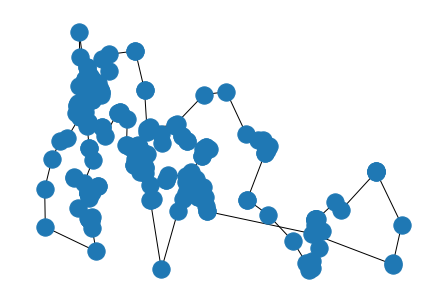

In [25]:
# Great Britain
tempNode = gBritainStoreLocation
n = len(tempNode)
G = nx.complete_graph(n)

for i,j in G.edges:
    G.edges[i,j]['distance'] = gBritainDistanceList[i][j]

T = nx.minimum_spanning_tree(G, weight='distance')
#nx.draw(T, pos=tempNode)

T = nx.minimum_spanning_tree(G, weight='distance')
#nx.draw(T, pos=tempNode)

# identify the odd degree node
odd_degree_nodes = [i for i in T.nodes if T.degree(i) % 2]

# find a minimum-cost perfect matching over the odd-degree nodes
for i,j in G.edges:
    G.edges[i,j]['neg_length'] = - G.edges[i,j]['distance']
matching = nx.max_weight_matching(G.subgraph(odd_degree_nodes), maxcardinality=True, weight='neg_length')
#print(matching)

# create a multigraph with edge_set = (spanning tree edges) + (matching)
M = nx.MultiGraph()

M.add_nodes_from(range(n))

M.add_edges_from(T.edges())
M.add_edges_from(matching)

# find the Eulerian cycle of the multigraph
#nx.draw(M,pos=tempNode)

initial_tour = list(nx.eulerian_circuit(M, source=255))

# take shortcut (avoid repeated nodes)
tour = [ 255 ]
for i,j in initial_tour:
    if j not in tour:
        tour.append(j)

# draw the tour
tour_edges = [ (tour[i-1], tour[i]) for i in range(n)]
nx.draw(G.edge_subgraph(tour_edges), pos=tempNode)

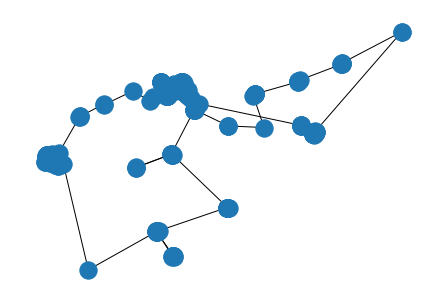

In [26]:
# China
tempNode = chinaStoreLocation
n = len(tempNode)
G = nx.complete_graph(n)

for i,j in G.edges:
    G.edges[i,j]['distance'] = chinaDistanceList[i][j]

T = nx.minimum_spanning_tree(G, weight='distance')
#nx.draw(T, pos=tempNode)

T = nx.minimum_spanning_tree(G, weight='distance')
#nx.draw(T, pos=tempNode)

# identify the odd degree node
odd_degree_nodes = [i for i in T.nodes if T.degree(i) % 2]

# find a minimum-cost perfect matching over the odd-degree nodes
for i,j in G.edges:
    G.edges[i,j]['neg_length'] = - G.edges[i,j]['distance']
matching = nx.max_weight_matching(G.subgraph(odd_degree_nodes), maxcardinality=True, weight='neg_length')
#print(matching)

# create a multigraph with edge_set = (spanning tree edges) + (matching)
M = nx.MultiGraph()

M.add_nodes_from(range(n))

M.add_edges_from(T.edges())
M.add_edges_from(matching)

# find the Eulerian cycle of the multigraph
#nx.draw(M,pos=tempNode)

initial_tour = list(nx.eulerian_circuit(M, source=255))

# take shortcut (avoid repeated nodes)
tour = [ 255 ]
for i,j in initial_tour:
    if j not in tour:
        tour.append(j)

# draw the tour
tour_edges = [ (tour[i-1], tour[i]) for i in range(n)]
nx.draw(G.edge_subgraph(tour_edges), pos=tempNode)